**Chapter 2 and Chapter 3 - Data Exploration**


# Setup

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ggplot syntax
from plotnine import *

# Code formatting
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [3]:
# Check versioning
import matplotlib

matplotlib.__version__

'3.1.3'

<IPython.core.display.Javascript object>

## Load example data

In [4]:
import sqlalchemy
import sqlalchemy_utils
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2

<IPython.core.display.Javascript object>

In [5]:
# Define a database name
# Set your postgres username
dbname = "baseball"
username = "lacar"  # change this to your username

# Working with PostgreSQL in Python
# Connect to make queries using psycopg2
con = None
con = psycopg2.connect(database=dbname, user=username)

# Here, we're using postgres, but sqlalchemy can connect to other things too.
engine = create_engine("postgres://%s@localhost/%s" % (username, dbname))
print(engine.url)

postgres://lacar@localhost/baseball


<IPython.core.display.Javascript object>

In [6]:
sql_query = """
SELECT *
FROM batting_stats;
"""
df_query = pd.read_sql_query(sql_query, con)
df_query.head()

,index,Season,Name,Team,Age,G,AB,PA,H,1B,...,wSL/C _pi,wXX/C _pi,O-Swing_perc _pi,Z-Swing_perc _pi,Swing_perc _pi,O-Contact_perc _pi,Z-Contact_perc _pi,Contact_perc _pi,Zone_perc _pi,Pace _pi
0,63,2018.0,Mookie Betts,Red Sox,25.0,136.0,520.0,614.0,180.0,96.0,...,1.93,NaN,0.185,0.535,0.356,0.658,0.926,0.855,0.490,23.3
1,67,2018.0,Mike Trout,Angels,26.0,140.0,471.0,608.0,147.0,80.0,...,2.55,-5.67,0.198,0.555,0.376,0.660,0.903,0.839,0.498,23.3
2,86,2019.0,Mike Trout,Angels,27.0,134.0,470.0,600.0,137.0,63.0,...,2.44,-3.09,0.191,0.559,0.368,0.653,0.884,0.822,0.481,23.6
3,101,2019.0,Alex Bregman,Astros,25.0,156.0,554.0,690.0,164.0,84.0,...,1.28,NaN,0.169,0.552,0.349,0.724,0.920,0.870,0.471,26.0
4,96,2017.0,Aaron Judge,Yankees,25.0,155.0,542.0,678.0,154.0,75.0,...,-0.71,NaN,0.260,0.632,0.411,0.417,0.829,0.674,0.407,24.4


<IPython.core.display.Javascript object>

## Using custom colors

Colors can be set to match themes in slides or other color schemes. See here for finding codes for colors: [Google theme html colors](https://imagecolorpicker.com).

In [10]:
# Colors and formatting

B_beige = "#CDA577"
B_brown = "#643E34"
B_slate = "#3F5B66"
B_dkgray = "#5A7E8E"
B_ltgray = "#6D949B"
B_green = "#01CB8B"
B_lime = "#D3F04A"

B_colors = [B_beige, B_brown, B_slate, B_dkgray, B_ltgray, B_green, B_lime]
B_colors_cat = [B_beige, B_green, B_brown, B_ltgray, B_slate, B_lime, B_dkgray]

# Code formatting Jupyter black
%load_ext nb_black

<IPython.core.display.Javascript object>

## Setting context

This makes it simple to set defaults that are more aesthetically pleasing.

In [6]:
sns.set_context("talk")

# Univariate data

## Histogram

### Quick and dirty with matplotlib

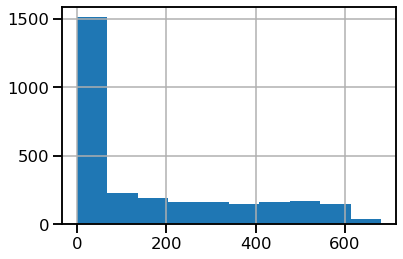

In [8]:
df_query["AB"].hist()

### Using custom colors and adding labels

Text(0, 0.5, 'histogram of at-bats')

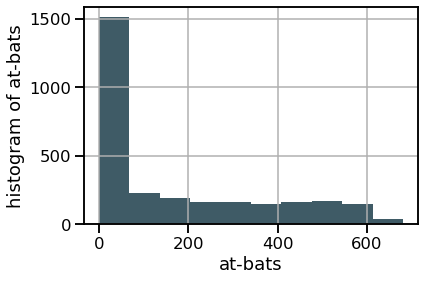

<IPython.core.display.Javascript object>

In [11]:
f, ax1 = plt.subplots()
df_query["AB"].hist(ax=ax1, color=B_slate)

ax1.set_xlabel("at-bats")
ax1.set_ylabel("no. of hitters")
ax1.set_ylabel("histogram of at-bats")

### Using seaborn context to set plot look

Setting context can be a fast way to set global settings across all the plots in the notebook.

In [13]:
sns.set_context(
    "talk", rc={"font.size": 16, "axes.titlesize": 16, "axes.labelsize": 14}
)

<IPython.core.display.Javascript object>

But make sure this is intended as it will overwrite the style of plots, even if you use the same code. Consider how this same code produces a plot that looks different from the first plot shown above ("quick and dirty" plot).

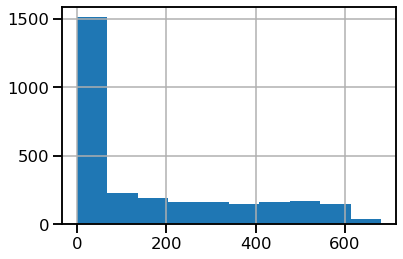

<IPython.core.display.Javascript object>

In [14]:
df_query["AB"].hist()

### Seaborn histogram

### Histogram by category

Let's filter the data by only looking at two teams (Padres and Dodgers) so that we can see how to plot a histogram using categories.

In [12]:
df_query_SDLA = df_query[df_query["Team"].isin(["Padres", "Dodgers"])].copy()

<IPython.core.display.Javascript object>

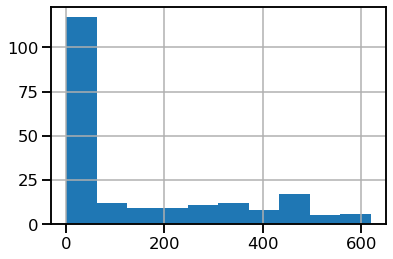

<IPython.core.display.Javascript object>

In [13]:
df_query_SDLA["AB"].hist()

### Histogram by category with facets

In [7]:
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins)

NameError: name 'tips' is not defined

In [ ]:
# Basic
df_query['AB'].hist();

In [ ]:
# Using seaborn context

# Bivariate data

## Boxplots (one qualitative variable, one quantitative variable)




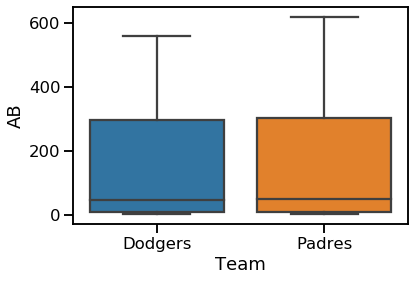

<IPython.core.display.Javascript object>

In [15]:
f, ax1 = plt.subplots()
sns.boxplot(data=df_query_SDLA, x="Team", y="AB")

## Scatter plots (two quantitative variables)

In [8]:
# Small, simple dataset
df_genes = pd.DataFrame()
df_genes["gene1"] = [10, 11, 8, 3, 2, 1]
df_genes["gene2"] = [6, 4, 5, 3, 2.8, 1]
df_genes

,gene1,gene2
0,10,6.0
1,11,4.0
2,8,5.0
3,3,3.0
4,2,2.8
5,1,1.0


<IPython.core.display.Javascript object>

### Quick plot with seaborn

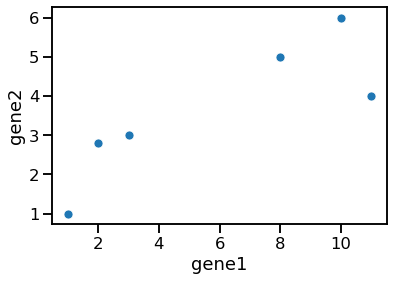

<IPython.core.display.Javascript object>

In [17]:
f, ax1 = plt.subplots()

sns.scatterplot(data=df_genes, x="gene1", y="gene2");


### Labeled data with matplotlib

(0, 6.272764900662251)

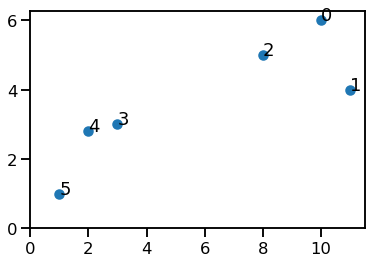

<IPython.core.display.Javascript object>

In [13]:
f, ax1 = plt.subplots()
ax1.scatter(df_genes["gene1"], df_genes["gene2"])
for i in df_genes.index.tolist():
    ax1.annotate(
        str(i), xy=(df_genes["gene1"].tolist()[i], df_genes["gene2"].tolist()[i])
    )
ax1.set_xlim(0, None)
ax1.set_ylim(0, None)


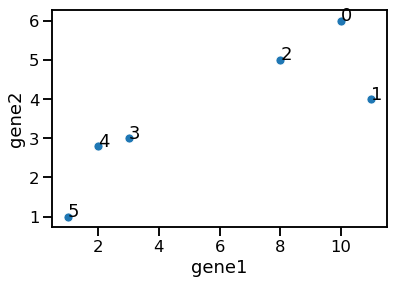

<IPython.core.display.Javascript object>

In [18]:
# With seaborn

f, ax1 = plt.subplots()
sns.scatterplot(data=df_genes, x="gene1", y="gene2", ax=ax1)

# annotate
for i in df_genes.index.tolist():
    ax1.annotate(
        str(i), xy=(df_genes["gene1"].tolist()[i], df_genes["gene2"].tolist()[i])
    )

### Open circles with seaborn

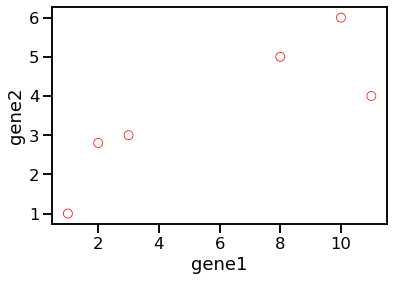

<IPython.core.display.Javascript object>

In [40]:
# With seaborn

f, ax1 = plt.subplots()
sns.scatterplot(
    data=df_genes, x="gene1", y="gene2", facecolors="none", edgecolor="r", ax=ax1
)

### Plotting with plotnine

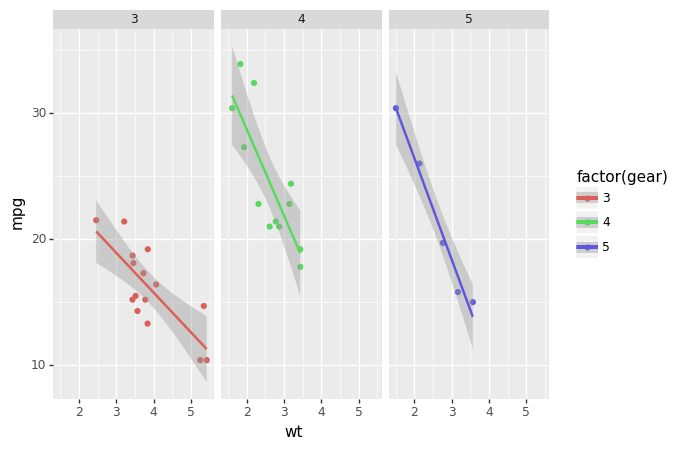

<ggplot: (311174085)>

<IPython.core.display.Javascript object>

In [11]:
(
    ggplot(mtcars, aes("wt", "mpg", color="factor(gear)"))
    + geom_point()
    + stat_smooth(method="lm")
    + facet_wrap("~gear")
)

#### Open circles

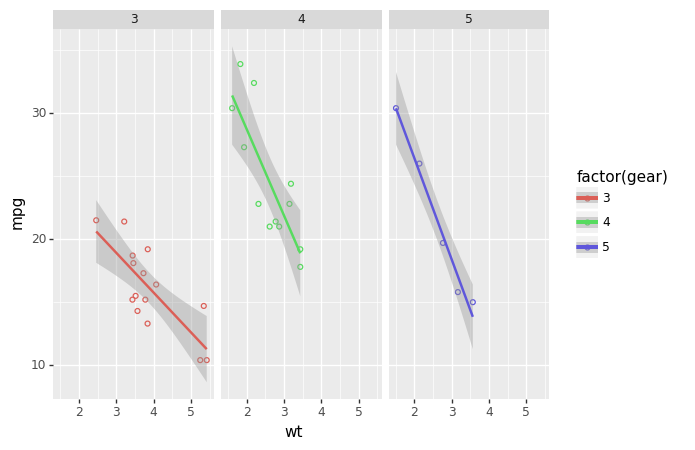

<ggplot: (273557494)>

<IPython.core.display.Javascript object>

In [20]:
(
    ggplot(mtcars, aes("wt", "mpg", color="factor(gear)"))
    + geom_point(fill="none")
    + stat_smooth(method="lm")
    + facet_wrap("~gear")
)